# Q-learning for policyIII

In [1]:
import numpy as np
import random
from random import sample
import math 
import matplotlib.pyplot as plt

In [2]:
def reset():
    st= [0]*17
    return tuple(st)

In [3]:
weibull_scale=(2365.08,996.88,713.55,1406.84,343.76,3933.12,828.19,2040.95)
weibull_shape=(414.16,109.25,79.81,115.21,169.81,143.60,43.83,296.48)
tf=(2,6.5,2.5,6,5,3.5,3,3.5)
tp=(0.4,5.42,0.625,0.857,1.25,0.7,0.429,0.875)
time_interval=5
running_time=100000

In [4]:
def env(action,st,step,i): 
    f = random.weibullvariate(weibull_scale[i],weibull_shape[i])
    reward =[]
    
    if step == 5000:#scheduled overhaul 
        for j in range(17):
            st[j] = 0
        st[8]=1 
        reward= -(time_interval / tp[i])*time_interval * math.ceil(0.8 *sum(tp)/time_interval) 
    else :    
        if action == 0 :
            if f <= st[i]:
                st[i+9]=1 #fail
                reward = -(time_interval / tp[i])*time_interval * math.ceil(tf[i]/time_interval)
                
            else:
                #st[i+9]=0
                st[i] +=5 #age
                reward = 5
        
        if action ==1 :
            if st[i+9]==0 :
                reward= -(time_interval / tp[i])*tp[i]
            else:
                reward= -(time_interval / tp[i])*time_interval * math.ceil(tf[i]/time_interval)
            st[i]=0
            st[i+9]=0
            
            
    
    return tuple(st) , reward

In [5]:
num_episodes=1000
min_lr=0.1
discount=0.5
decay=25

In [6]:
def choose_action(epsilon, state,i):
    if (state[i+9]==1):
        return 1
    else:
        if (np.random.random() < epsilon):
            return random.choice([0,1]) 
        else:
            st=(state[i],state[i+9])
            return np.argmax(Q_table[st])
            

In [7]:
def get_learning_rate( t):
    
    """Gets value for learning rate. It declines as we advance in episodes."""
    # Learning rate also declines as we add more episodes
    return max(min_lr, min(1., 1. - math.log10((t + 1) / decay)))


# replacement time for tire

In [50]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []

i=0

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    step = 0
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs , reward = env(action , list(current_state),step,i)
        rewards.append(reward)
        new_state = obs
        step += 5
        if step == 5005:
            step = 0
            
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
            
    
    scores.append(sum(rewards))

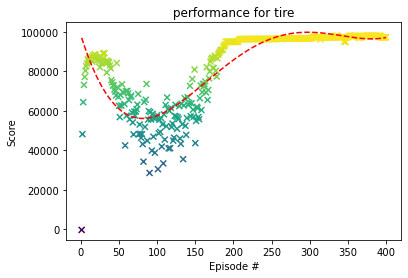

In [51]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for tire ')
plt.show()

In [30]:
optimal =[]
current_state = reset()
i=0
step = 0
for j in range(50000):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action , list(current_state),step,i)
    step += 5
    if step ==5005:
        step = 0
    current_state = obs
    #print (current_state[i] ,action,reward,obs[i] )
np.unique(optimal)

array([2320])

# transmission

In [21]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []

i=1

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    step = 0
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs , reward = env(action , list(current_state),step,i)
        rewards.append(reward)
        new_state = obs
        step += 5
        if step == 5005:
            step = 0
            
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
            
    
    scores.append(sum(rewards))

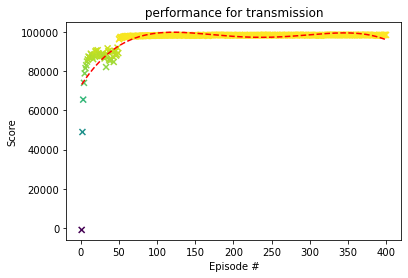

In [22]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for transmission ')
plt.show()

In [23]:
optimal =[]
current_state = reset()
i=1
step = 0
for j in range(50000):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action , list(current_state),step,i)
    step += 5
    if step ==5005:
        step = 0
    current_state = obs
    #print (current_state[i] ,action,reward,obs[i] )
np.unique(optimal)

array([975])

# Wheel rim

In [24]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []

i=2

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    step = 0
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs , reward = env(action , list(current_state),step,i)
        rewards.append(reward)
        new_state = obs
        step += 5
        if step == 5005:
            step = 0
            
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
            
    
    scores.append(sum(rewards))

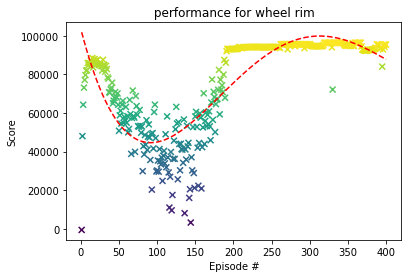

In [25]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for wheel rim ')
plt.show()

In [35]:
optimal =[]
current_state = reset()
i=2
step = 0
for j in range(50000):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action , list(current_state),step,i)
    step += 5
    if step ==5005:
        step = 0
    current_state = obs
    #print (current_state[i] ,action,reward,obs[i] )
np.unique(optimal)

array([675])

# coupling

In [29]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []

i=3

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    step = 0
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs , reward = env(action , list(current_state),step,i)
        rewards.append(reward)
        new_state = obs
        step += 5
        if step == 5005:
            step = 0
            
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
            
    
    scores.append(sum(rewards))

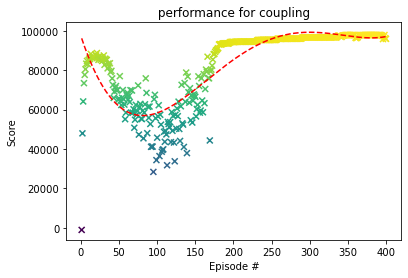

In [30]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for coupling ')
plt.show()

In [37]:
optimal =[]
current_state = reset()
i=3
step = 0
for j in range(50000):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action , list(current_state),step,i)
    step += 5
    if step ==5005:
        step = 0
    current_state = obs
    #print (current_state[i] ,action,reward,obs[i] )
np.unique(optimal)

array([1305])

# Motor

In [34]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []

i=4

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    step = 0
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs , reward = env(action , list(current_state),step,i)
        rewards.append(reward)
        new_state = obs
        step += 5
        if step == 5005:
            step = 0
            
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
            
    
    scores.append(sum(rewards))

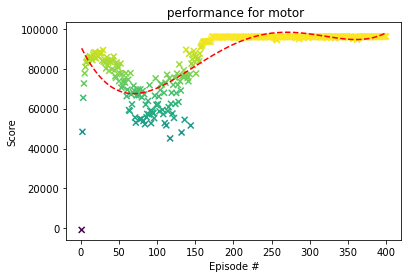

In [35]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for motor')
plt.show()

In [36]:
optimal =[]
current_state = reset()
i=4
step = 0
for j in range(50000):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action , list(current_state),step,i)
    step += 5
    if step ==5005:
        step = 0
    current_state = obs
    #print (current_state[i] ,action,reward,obs[i] )
np.unique(optimal)

array([340])

# Brake

In [37]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []

i=5

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    step = 0
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs , reward = env(action , list(current_state),step,i)
        rewards.append(reward)
        new_state = obs
        step += 5
        if step == 5005:
            step = 0
            
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
            
    
    scores.append(sum(rewards))

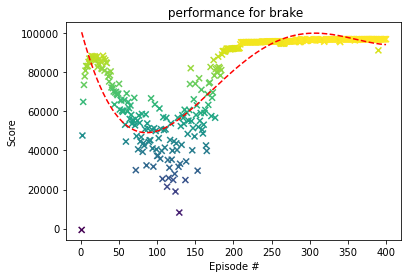

In [38]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for brake')
plt.show()

In [41]:
optimal =[]
current_state = reset()
i=5
step = 0
for j in range(50000):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action , list(current_state),step,i)
    step += 5
    if step ==5005:
        step = 0
    current_state = obs
    #print (current_state[i] ,action,reward,obs[i] )
np.unique(optimal)

array([3705])

# Steering wheel

In [46]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []

i=6

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    step = 0
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs , reward = env(action , list(current_state),step,i)
        rewards.append(reward)
        new_state = obs
        step += 5
        if step == 5005:
            step = 0
            
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
            
    
    scores.append(sum(rewards))

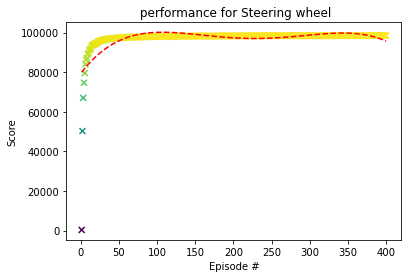

In [47]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for Steering wheel')
plt.show()

In [49]:
optimal =[]
current_state = reset()
i=6
step = 0
for j in range(50000):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action , list(current_state),step,i)
    step += 5
    if step ==5005:
        step = 0
    current_state = obs
    #print (current_state[i] ,action,reward,obs[i] )
np.unique(optimal)

array([700])

# Shifting gears

In [43]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []

i=7

# Looping for each episode
for e in range(400):
    # Initializes the state
    current_state = reset()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1) 
    step = 0
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs , reward = env(action , list(current_state),step,i)
        rewards.append(reward)
        new_state = obs
        step += 5
        if step == 5005:
            step = 0
            
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
            
    
    scores.append(sum(rewards))

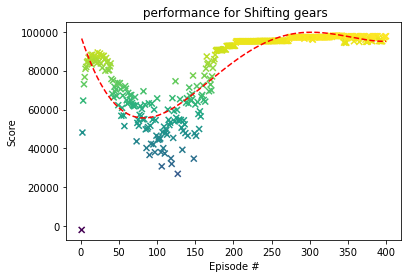

In [44]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance for Shifting gears')
plt.show()

In [45]:
optimal =[]
current_state = reset()
i=7
step = 0
for j in range(50000):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs,reward = env(action , list(current_state),step,i)
    step += 5
    if step ==5005:
        step = 0
    current_state = obs
    #print (current_state[i] ,action,reward,obs[i] )
np.unique(optimal)

array([2005])